### Predicting the Weather with Machine Learning
#### Introduction
This project will investigate the use of machine learning in python to predict the weather. The data is taken from https://www.noaa.gov/ and the chosen location is Oakland Airport in California. An airport was chosen as these locations have a wide array of accurate weather sensors. The data set is between 01-01-1980 to 01-01-2023.
#### Background
Machine learning is a field aimed at building and understanding computational models that implements methods that leverage data to improve performance on some set of tasks. Machine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisions without being explicitly programmed to do so. [1] 

Some studies have shown that machine learning-based forecast systems can predict general weather patterns as well as numerical weather prediction models while using only a fraction of the computing power the models require. These new tools don’t yet forecast the details of local weather that people care about, but with many researchers carefully testing them and inventing new methods machine learning in weather forecasting is a useful tool for the future. [2]
#### Objectives
The objectives of this project are:
- Clean and prepare a dataset for machine learning
- Analyze variables to select as predictors for our model
- Train a machinelearning model using the scikit python library and its tools
- Investigate further methods to improve output accuracy of the model

In [1]:
#read in the data
import pandas as pd
weather = pd.read_csv('OakWeather.csv', index_col='DATE')
weather.head(3)

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,MDPR,PGTM,PRCP,...,WSFG,WT01,WT02,WT03,WT04,WT05,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",20.0,20.0,NaN,NaN,NaN,NaN,1136.0,0.0,...,20.8,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1970-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,0.0,NaN,NaN,NaN,NaN,318.0,0.0,...,21.9,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1970-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",0.0,0.0,NaN,NaN,NaN,NaN,1554.0,0.0,...,13.9,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [2]:
weather.loc['2022-01-02',:]

STATION                             USW00023230
NAME       OAKLAND INTERNATIONAL AIRPORT, CA US
ACMH                                        NaN
ACSH                                        NaN
AWND                                       2.91
DAPR                                        NaN
FMTM                                        NaN
MDPR                                        NaN
PGTM                                        NaN
PRCP                                        0.0
SNOW                                        NaN
SNWD                                        NaN
TAVG                                        NaN
TMAX                                       55.0
TMIN                                       32.0
TSUN                                        NaN
WDF1                                        NaN
WDF2                                      300.0
WDF5                                      310.0
WDFG                                        NaN
WSF1                                    

The data above shows us there are 23 weather stations across the location with 20 recorded variables per station
#### Cleaning and Preparing the Data

In [3]:
#cleaning the data
weather.apply(pd.isnull).sum()/weather.shape[0]
#this gives percentage of null values per colum

STATION    0.000000
NAME       0.000000
ACMH       0.703359
ACSH       0.703359
AWND       0.380657
DAPR       0.999409
FMTM       0.838317
MDPR       0.999409
PGTM       0.389959
PRCP       0.020746
SNOW       0.429531
SNWD       0.420303
TAVG       0.849612
TMAX       0.000812
TMIN       0.001034
TSUN       0.915024
WDF1       0.703359
WDF2       0.380583
WDF5       0.387080
WDFG       0.703359
WSF1       0.703359
WSF2       0.380509
WSF5       0.387080
WSFG       0.703359
WT01       0.766261
WT02       0.979181
WT03       0.993503
WT04       0.999705
WT05       0.999557
WT08       0.847841
WT09       0.999926
WT16       0.925212
WT18       0.999852
dtype: float64

In the documentation received with the dataset it states that the five core values are:
- PRCP = Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)
- SNOW = Snowfall (mm or inches as per user preference, inches to tenths on Daily Form pdf file)
- SNWD = Snow depth (mm or inches as per user preference, inches on Daily Form pdf file)
- TMAX = Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on
- TMIN = Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on

From this we can create a core dataset

In [4]:
core_weather = weather[['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']].copy()
#rename the columns
core_weather.columns = ('Precipitation', 'Snow', 'Snow_Depth', 'Temp_Max', 'Temp_Min')

#### Filling in Null Values

In [5]:
#checking for null values
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

Precipitation    0.020746
Snow             0.429531
Snow_Depth       0.420303
Temp_Max         0.000812
Temp_Min         0.001034
dtype: float64

In [6]:
core_weather['Snow'].value_counts()

0.0    7726
1.0       1
Name: Snow, dtype: int64

This shows us there has been no snow in the dataset, we can discard this data as well as snow depth as the machine learning model will not be able to predict any snowfall in the area if none has occured before.

In [7]:
del core_weather['Snow']
del core_weather['Snow_Depth']

In [8]:
core_weather[pd.isnull(core_weather['Precipitation'])]

,Precipitation,Temp_Max,Temp_Min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [9]:
core_weather.loc['1983-10-20':'1983-11-05',:]

,Precipitation,Temp_Max,Temp_Min
DATE,,,
1983-10-20,0.00,73.0,52.0
1983-10-21,0.00,70.0,50.0
1983-10-22,0.00,70.0,50.0
1983-10-23,0.00,69.0,60.0
1983-10-24,0.00,73.0,58.0
1983-10-25,0.00,75.0,53.0
1983-10-26,0.00,79.0,53.0
1983-10-27,0.00,82.0,56.0
1983-10-28,0.00,74.0,56.0


We can see on some days there is no precipitation and then on other days there is no data. If it rains one day it doesnt mean it will rain the next so we need to change the missing values. Changing the null values to zero is not a bad bet as it doesnt rain most days in the dataset.

In [10]:
core_weather['Precipitation'] = core_weather['Precipitation'].fillna(0)

In [11]:
core_weather[pd.isnull(core_weather['Temp_Max'])]

,Precipitation,Temp_Max,Temp_Min
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


In [12]:
core_weather['Temp_Max'] = core_weather['Temp_Max'].fillna(method='ffill')

#### Verifying the Correct Data

In [13]:
core_weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26', '2022-12-27',
       '2022-12-28', '2022-12-29', '2022-12-30', '2022-12-31', '2023-01-01'],
      dtype='object', name='DATE', length=13545)

In [14]:
core_weather.index = pd.to_datetime(core_weather.index)
core_weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-12-23', '2022-12-24', '2022-12-25', '2022-12-26',
               '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30',
               '2022-12-31', '2023-01-01'],
              dtype='datetime64[ns]', name='DATE', length=13545, freq=None)

In [15]:
core_weather.apply(lambda x: (x==9999).sum())

Precipitation    0
Temp_Max         0
Temp_Min         0
dtype: int64

#### Analyzing the Weather Data

<AxesSubplot:xlabel='DATE'>

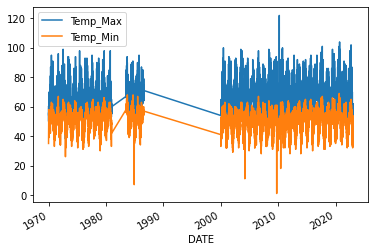

In [16]:
import matplotlib.pyplot as plt
core_weather[['Temp_Max','Temp_Min']].plot()

Here we can see some of the dates are missing, lets investigate this further.

In [17]:
core_weather.index.year.value_counts().sort_index()

1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023      1
Name: DATE, dtype: int64

The years 1981,1982 and 1987-1999 are missing. this is a large portion of our dataset that needs to be completed as we are using historical data to predict the future data. This shouldnt matter too much as we are using historical data to predict future data. A remedy for this would be to find a a nearby weather station that had these dates in its data set and merge the two datasets. For now we will ignore the missing data and continue with the analysis as this won't impact us too much.

<AxesSubplot:xlabel='DATE'>

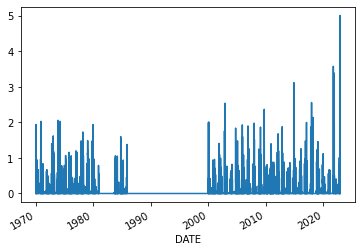

In [18]:
core_weather['Precipitation'].plot()

In [19]:
#We can group weather by year and apply a function to count up how much you get ranked.
#core_weather.groupby(core_weather.index.year).sum()

#### Training our first Machine Learning Model
We want to predict tomorrows maximum temperature using the historical data. We will set up another column.

In [20]:
#This will pull every row back by 1 to generate our target column
core_weather['Target'] = core_weather.shift(-1)['Temp_Max']
core_weather

,Precipitation,Temp_Max,Temp_Min,Target
DATE,,,,
1970-01-01,0.00,60.0,35.0,52.0
1970-01-02,0.00,52.0,39.0,52.0
1970-01-03,0.00,52.0,35.0,53.0
1970-01-04,0.00,53.0,36.0,52.0
1970-01-05,0.00,52.0,35.0,50.0
...,...,...,...,...
2022-12-28,0.00,57.0,40.0,56.0
2022-12-29,0.42,56.0,49.0,60.0
2022-12-30,0.88,60.0,54.0,57.0


In [21]:
core_weather = core_weather.iloc[:-1,:].copy()
core_weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='DATE', length=13544, freq=None)

In [22]:
core_weather

,Precipitation,Temp_Max,Temp_Min,Target
DATE,,,,
1970-01-01,0.00,60.0,35.0,52.0
1970-01-02,0.00,52.0,39.0,52.0
1970-01-03,0.00,52.0,35.0,53.0
1970-01-04,0.00,53.0,36.0,52.0
1970-01-05,0.00,52.0,35.0,50.0
...,...,...,...,...
2022-12-27,1.77,58.0,49.0,57.0
2022-12-28,0.00,57.0,40.0,56.0
2022-12-29,0.42,56.0,49.0,60.0


We will use ridge regression which is a type of regression that minimizes overfitting to start. Alpha parameter controls how much the coefficients of the regression model are penalised, greater the penalty the more overfitting.

In [23]:
from sklearn.linear_model import Ridge
import numpy as np
reg = Ridge(alpha=.1)
#previously resulted in error stating it contained NaN or infinity
#core_weather = core_weather[np.isfinite(core_weather).all(1)]
#core_weather.apply(pd.isnull).sum()
print(core_weather.index)
core_weather = core_weather.replace((np.inf, -np.inf, np.nan), 0)
print(core_weather.index)
predictors = ['Precipitation', 'Temp_Max', 'Temp_Min']
train = core_weather.loc[:'2020-12-31']
test = core_weather.loc["2021-01-01":]
print(test)

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='DATE', length=13544, freq=None)
DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='DATE', length=13544, freq=None)
            Precipitation  Temp_Max  Temp_Min  Target
DATE          

In [24]:
X, Y = train[predictors], train['Target']
reg.fit(X,Y)

Ridge(alpha=0.1)

In [25]:
predictions = reg.predict(test[predictors])

In [26]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test['Target'], predictions)

3.419804018834375

This tells us on average we are 3.5 degrees off the actual temperature.

#### Evaluating the Model
This allows us to compare the predictions and the actual data

In [27]:
import pandas as pd
combined = pd.concat([test['Target'], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ['Actual','Predictions']
#combined['Date'] = pd.date_range(start='1/1/1970', periods=len(combined), freq='D')
#combined.drop(combined.columns[0], axis=1)
combined.index              

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='DATE', length=730, freq=None)

<AxesSubplot:xlabel='DATE'>

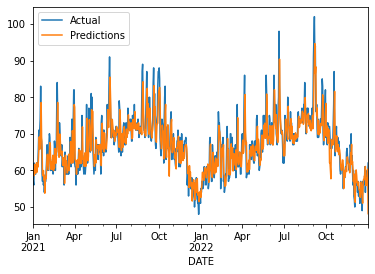

In [28]:
combined.plot()

A few cases where the peak is a lot higher than the predictions

In [29]:
reg.coef_

array([-2.29476176,  0.72504295,  0.16659015])

Precipitation index is a negative, indiciating that if it rains then tomorrow will likely be colder. (Precip has a negative impact on temp). Temp Max is the biggest input, previous days maximum temperature is the biggest inputs to the next days Temp Max.

#### Creating a Function

In [30]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:'2020-12-31']
    test = core_weather.loc["2021-01-01":]
    reg.fit(train[predictors], train['Target'])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test['Target'], predictions)
    combined = pd.concat([test['Target'], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ['Actual','Predictions']
    return error, combined

#### Adding in Rolling Means
A rolling mean will take the last few rows before the current row and will compute the average of a column across those rows. (A 5 day rolling mean from Jan 6th would take means from Jan 1st to Jan 5th)

In [31]:
core_weather['Month_Max'] = core_weather['Temp_Max'].rolling(30).max()
# For the temperature max column for the 30 days before every row find the 
# rolling mean and assign it to the month max variable
core_weather

,Precipitation,Temp_Max,Temp_Min,Target,Month_Max
DATE,,,,,
1970-01-01,0.00,60.0,35.0,52.0,NaN
1970-01-02,0.00,52.0,39.0,52.0,NaN
1970-01-03,0.00,52.0,35.0,53.0,NaN
1970-01-04,0.00,53.0,36.0,52.0,NaN
1970-01-05,0.00,52.0,35.0,50.0,NaN
...,...,...,...,...,...
2022-12-27,1.77,58.0,49.0,57.0,61.0
2022-12-28,0.00,57.0,40.0,56.0,61.0
2022-12-29,0.42,56.0,49.0,60.0,61.0


In [32]:
core_weather['Month_Day_Max'] = core_weather['Month_Max'] / core_weather['Temp_Max']
core_weather

,Precipitation,Temp_Max,Temp_Min,Target,Month_Max,Month_Day_Max
DATE,,,,,,
1970-01-01,0.00,60.0,35.0,52.0,NaN,NaN
1970-01-02,0.00,52.0,39.0,52.0,NaN,NaN
1970-01-03,0.00,52.0,35.0,53.0,NaN,NaN
1970-01-04,0.00,53.0,36.0,52.0,NaN,NaN
1970-01-05,0.00,52.0,35.0,50.0,NaN,NaN
...,...,...,...,...,...,...
2022-12-27,1.77,58.0,49.0,57.0,61.0,1.051724
2022-12-28,0.00,57.0,40.0,56.0,61.0,1.070175
2022-12-29,0.42,56.0,49.0,60.0,61.0,1.089286


In [33]:
core_weather['Max_Min'] = core_weather['Temp_Max'] / core_weather['Temp_Min']
core_weather

,Precipitation,Temp_Max,Temp_Min,Target,Month_Max,Month_Day_Max,Max_Min
DATE,,,,,,,
1970-01-01,0.00,60.0,35.0,52.0,NaN,NaN,1.714286
1970-01-02,0.00,52.0,39.0,52.0,NaN,NaN,1.333333
1970-01-03,0.00,52.0,35.0,53.0,NaN,NaN,1.485714
1970-01-04,0.00,53.0,36.0,52.0,NaN,NaN,1.472222
1970-01-05,0.00,52.0,35.0,50.0,NaN,NaN,1.485714
...,...,...,...,...,...,...,...
2022-12-27,1.77,58.0,49.0,57.0,61.0,1.051724,1.183673
2022-12-28,0.00,57.0,40.0,56.0,61.0,1.070175,1.425000
2022-12-29,0.42,56.0,49.0,60.0,61.0,1.089286,1.142857


In [34]:
predictors = ['Precipitation', 'Temp_Max', 'Temp_Min', 'Month_Max', 'Month_Day_Max', 'Max_Min']
#remove first 30 as they ar NaN
core_weather = core_weather.iloc[30:,:].copy()
core_weather.apply(pd.isnull).sum()
core_weather = core_weather.replace((np.inf, -np.inf, np.nan), 0)
error, combined = create_predictions(predictors, core_weather, reg)
error

3.4242044950201413

<AxesSubplot:xlabel='DATE'>

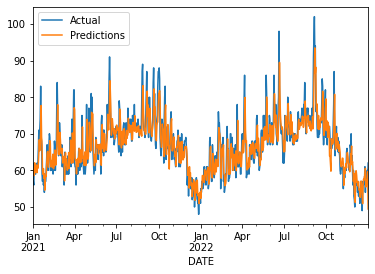

In [35]:
combined.index
combined.plot()

In [36]:
core_weather.index = pd.to_datetime(core_weather.index)
core_weather['Monthly_Avg'] = core_weather['Temp_Max'].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

In [37]:
core_weather['Day_Of_The_Year_Avg'] = core_weather['Temp_Max'].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())
predictors = ['Precipitation', 'Temp_Max', 'Temp_Min', 'Month_Max', 'Month_Day_Max', 'Max_Min','Day_Of_The_Year_Avg']
error, combined = create_predictions(predictors, core_weather, reg)
error

3.320597925457098

Error has gone down slightly now, so on average our prediction is within 3.32 degrees of the actual values.

In [38]:
reg.coef_

array([-1.28248254,  0.49949129,  0.05981894,  0.13067664, -7.15242167,
        0.07485414,  0.25160475])

Index 4 is greatly impacting our prediction, this means that the ratio between the average temperature in the last 30 days in todays temperature seems to be fairly significant to the algorithm

In [39]:
core_weather.corr()['Target']

Precipitation         -0.206272
Temp_Max               0.818659
Temp_Min               0.570184
Target                 1.000000
Month_Max              0.589446
Month_Day_Max         -0.206138
Max_Min                0.040570
Monthly_Avg            0.690969
Day_Of_The_Year_Avg    0.715635
Name: Target, dtype: float64

A lot of these columns highly correlate to the target value, from this we can select the columns we want to use as the predictors. In this case we would take Temp_Max, Day_Of_The_Year_Avg, Monthly_Avg, Temp_Min and Month_Max.

In [40]:
combined['Diff'] = (combined['Actual'] - combined['Predictions']).abs()

In [41]:
combined.sort_values('Diff', ascending=False).head()
#givesabsolute difference between actual values and combined values

,Actual,Predictions,Diff
DATE,,,
2022-06-20,98.0,76.726716,21.273284
2022-05-23,86.0,69.846807,16.153193
2022-09-03,91.0,76.215001,14.784999
2021-01-17,83.0,68.725862,14.274138
2021-04-01,62.0,75.624128,13.624128


#### Using Backtesting
This section will streamline all of the code above into one function that receives the dataframe, regression model and the predictors. The output is a concatenated dataset of the predicted data, actual data and the difference. Additional predictor variables will also be implemented after the fucntion.

For simplicity we will re read the same dataset and name it with different variables.

In [42]:
import pandas as pd

weather = pd.read_csv('OakWeather.csv', index_col='DATE')
weather_bt = weather[['PRCP', 'TMAX', 'TMIN']].copy()
weather_bt.columns = ('Precipitation', 'Temp_Max', 'Temp_Min')

weather_bt.index = pd.to_datetime(weather_bt.index)
weather_bt['Target'] = weather_bt.shift(-1)['Temp_Max']
weather_bt = weather_bt.iloc[:-1,:].copy()

weather_bt['Month_Max'] = weather_bt['Temp_Max'].rolling(30).max()
weather_bt['Month_Day_Max'] = weather_bt['Month_Max'] / weather_bt['Temp_Max']
weather_bt['Monthly_Avg'] = weather_bt['Temp_Max'].groupby(weather_bt.index.month).apply(lambda x: x.expanding(1).mean())
weather_bt['Day_Of_The_Year_Avg'] = weather_bt['Temp_Max'].groupby(weather_bt.index.day_of_year).apply(lambda x: x.expanding(1).mean())

weather_bt = weather_bt.replace((np.nan, np.inf,-np.inf),0)
from sklearn.linear_model import Ridge


rr = Ridge(alpha=.1)



predictors_bt = ['Temp_Max', 'Day_Of_The_Year_Avg', 'Monthly_Avg', 'Temp_Min', 'Month_Max', 'Precipitation']
core_weather

,Precipitation,Temp_Max,Temp_Min,Target,Month_Max,Month_Day_Max,Max_Min,Monthly_Avg,Day_Of_The_Year_Avg
DATE,,,,,,,,,
1970-01-31,0.01,55.0,43.0,59.0,62.0,1.127273,1.279070,55.000000,55.000000
1970-02-01,0.01,59.0,48.0,64.0,62.0,1.050847,1.229167,59.000000,59.000000
1970-02-02,0.00,64.0,44.0,57.0,64.0,1.000000,1.454545,61.500000,64.000000
1970-02-03,0.00,57.0,44.0,60.0,64.0,1.122807,1.295455,60.000000,57.000000
1970-02-04,0.00,60.0,48.0,57.0,64.0,1.066667,1.250000,60.000000,60.000000
...,...,...,...,...,...,...,...,...,...
2022-12-27,1.77,58.0,49.0,57.0,61.0,1.051724,1.183673,57.093613,55.162162
2022-12-28,0.00,57.0,40.0,56.0,61.0,1.070175,1.425000,57.093531,55.324324
2022-12-29,0.42,56.0,49.0,60.0,61.0,1.089286,1.142857,57.092576,56.000000


In [43]:
def backtest(weather_bt, model, predictors_bt, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather_bt.shape[0], step):
        train_bt = weather_bt.iloc[:i,:]
        test_bt = weather_bt.iloc[i:(i+step),:]
        
        model.fit(train_bt[predictors_bt], train_bt['Target'])
        
        preds = model.predict(test_bt[predictors_bt])
        preds = pd.Series(preds, index=test_bt.index)
        combined_bt = pd.concat([test_bt['Target'], preds], axis = 1)
        
        combined_bt.columns = ['Actual', 'Prediction']
        
        combined_bt['Diff'] = (combined_bt['Prediction'] - combined['Actual']).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

#### Making Predictions

In [44]:
predictions = backtest(weather_bt, rr, predictors_bt)
predictions

,Actual,Predictions,Diff
DATE,,,
2021-01-01,57.0,59.430037,2.430037
2021-01-02,56.0,57.670092,1.670092
2021-01-03,62.0,57.098511,4.901489
2021-01-04,59.0,60.654578,1.654578
2021-01-05,59.0,58.825929,0.174071
...,...,...,...
2022-12-27,57.0,55.986183,1.013817
2022-12-28,56.0,57.145209,1.145209
2022-12-29,60.0,56.657645,3.342355


As before we will generate the mean absolute error to gain a more accurate metric on how far off the predicted data is.

In [45]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions['Actual'], predictions['Predictions'])

3.3205979254570974

To obtain more accurate data we will write some more functions that take into account the average temperature over the past 3 days and the past 4 days.

In [46]:
def pct_diff(old, new):
    return new - old / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}" #creates a dynamic string
    
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizons = [3,14]

for horizon in rolling_horizons:
    for col in ['Temp_Max', 'Temp_Min', 'Precipitation']:
        weather = compute_rolling(weather_bt, horizon, col)
    
weather

,Precipitation,Temp_Max,Temp_Min,Target,Month_Max,Month_Day_Max,Monthly_Avg,Day_Of_The_Year_Avg,rolling_3_Temp_Max,rolling_3_Temp_Max_pct,rolling_3_Temp_Min,rolling_3_Temp_Min_pct,rolling_3_Precipitation,rolling_3_Precipitation_pct,rolling_14_Temp_Max,rolling_14_Temp_Max_pct,rolling_14_Temp_Min,rolling_14_Temp_Min_pct,rolling_14_Precipitation,rolling_14_Precipitation_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-01,0.00,60.0,35.0,52.0,0.0,0.000000,60.000000,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,0.00,52.0,39.0,52.0,0.0,0.000000,56.000000,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,0.00,52.0,35.0,53.0,0.0,0.000000,54.666667,52.000000,54.666667,51.0,36.333333,34.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,0.00,53.0,36.0,52.0,0.0,0.000000,54.250000,53.000000,52.333333,52.0,36.666667,35.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,0.00,52.0,35.0,50.0,0.0,0.000000,53.800000,52.000000,52.333333,51.0,35.333333,34.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,1.77,58.0,49.0,57.0,61.0,1.051724,57.093613,55.162162,57.666667,57.0,45.000000,48.0,0.663333,0.77,55.214286,57.0,39.428571,48.0,0.142143,0.77
2022-12-28,0.00,57.0,40.0,56.0,61.0,1.070175,57.093531,55.324324,56.333333,56.0,44.333333,39.0,0.663333,-1.00,55.642857,56.0,39.785714,39.0,0.142143,-1.00
2022-12-29,0.42,56.0,49.0,60.0,61.0,1.089286,57.092576,56.000000,57.000000,55.0,46.000000,48.0,0.730000,-0.58,55.785714,55.0,40.571429,48.0,0.172143,-0.58


Missing values are due to not enough previous days of the current rolling mean computation, so is filled with Nan

In [47]:
#cut out first 14 rows as they are missing
weather = weather.iloc[14:,:]
weather = weather.fillna(0)
weather

,Precipitation,Temp_Max,Temp_Min,Target,Month_Max,Month_Day_Max,Monthly_Avg,Day_Of_The_Year_Avg,rolling_3_Temp_Max,rolling_3_Temp_Max_pct,rolling_3_Temp_Min,rolling_3_Temp_Min_pct,rolling_3_Precipitation,rolling_3_Precipitation_pct,rolling_14_Temp_Max,rolling_14_Temp_Max_pct,rolling_14_Temp_Min,rolling_14_Temp_Min_pct,rolling_14_Precipitation,rolling_14_Precipitation_pct
DATE,,,,,,,,,,,,,,,,,,,,
1970-01-15,0.63,56.0,51.0,61.0,0.0,0.000000,55.066667,56.000000,57.666667,55.0,52.666667,50.0,0.940000,-0.37,54.714286,55.0,45.357143,50.0,0.272857,-0.37
1970-01-16,0.62,61.0,56.0,59.0,0.0,0.000000,55.437500,61.000000,58.333333,60.0,53.333333,55.0,1.063333,-0.38,55.357143,60.0,46.571429,55.0,0.317143,-0.38
1970-01-17,0.00,59.0,54.0,58.0,0.0,0.000000,55.647059,59.000000,58.666667,58.0,53.666667,53.0,0.416667,-1.00,55.857143,58.0,47.928571,53.0,0.317143,-1.00
1970-01-18,0.00,58.0,53.0,60.0,0.0,0.000000,55.777778,58.000000,59.333333,57.0,54.333333,52.0,0.206667,-1.00,56.214286,57.0,49.142857,52.0,0.317143,-1.00
1970-01-19,0.14,60.0,53.0,60.0,0.0,0.000000,56.000000,60.000000,59.000000,59.0,53.333333,52.0,0.046667,-0.86,56.785714,59.0,50.428571,52.0,0.327143,-0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,1.77,58.0,49.0,57.0,61.0,1.051724,57.093613,55.162162,57.666667,57.0,45.000000,48.0,0.663333,0.77,55.214286,57.0,39.428571,48.0,0.142143,0.77
2022-12-28,0.00,57.0,40.0,56.0,61.0,1.070175,57.093531,55.324324,56.333333,56.0,44.333333,39.0,0.663333,-1.00,55.642857,56.0,39.785714,39.0,0.142143,-1.00
2022-12-29,0.42,56.0,49.0,60.0,61.0,1.089286,57.092576,56.000000,57.000000,55.0,46.000000,48.0,0.730000,-0.58,55.785714,55.0,40.571429,48.0,0.172143,-0.58


In [48]:
#function that returns means of all previous rows together
def expand_mean(df):
    return df.expanding(1).mean()

for col in ['Temp_Max', 'Temp_Min', 'Precipitation']:
    weather[f"Month_Avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    #group_keys=false tells pandas to keep output clean and not include another index
    weather[f"Day_Avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

#for simplicity I have removed some of the old Average columns from the dataset
del weather['Month_Max']
del weather['Month_Day_Max']
del weather['Monthly_Avg']
del weather['Day_Of_The_Year_Avg']

weather
#This function will show the average temperature/precipitation in a given month but only on days that we already had information on
#This is so we don't take data from dates that haven't actually occured yet so we cannot include them in our predictions

,Precipitation,Temp_Max,Temp_Min,Target,rolling_3_Temp_Max,rolling_3_Temp_Max_pct,rolling_3_Temp_Min,rolling_3_Temp_Min_pct,rolling_3_Precipitation,rolling_3_Precipitation_pct,...,rolling_14_Temp_Min,rolling_14_Temp_Min_pct,rolling_14_Precipitation,rolling_14_Precipitation_pct,Month_Avg_Temp_Max,Day_Avg_Temp_Max,Month_Avg_Temp_Min,Day_Avg_Temp_Min,Month_Avg_Precipitation,Day_Avg_Precipitation
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-15,0.63,56.0,51.0,61.0,57.666667,55.0,52.666667,50.0,0.940000,-0.37,...,45.357143,50.0,0.272857,-0.37,56.000000,56.000000,51.000000,51.000000,0.630000,0.630000
1970-01-16,0.62,61.0,56.0,59.0,58.333333,60.0,53.333333,55.0,1.063333,-0.38,...,46.571429,55.0,0.317143,-0.38,58.500000,61.000000,53.500000,56.000000,0.625000,0.620000
1970-01-17,0.00,59.0,54.0,58.0,58.666667,58.0,53.666667,53.0,0.416667,-1.00,...,47.928571,53.0,0.317143,-1.00,58.666667,59.000000,53.666667,54.000000,0.416667,0.000000
1970-01-18,0.00,58.0,53.0,60.0,59.333333,57.0,54.333333,52.0,0.206667,-1.00,...,49.142857,52.0,0.317143,-1.00,58.500000,58.000000,53.500000,53.000000,0.312500,0.000000
1970-01-19,0.14,60.0,53.0,60.0,59.000000,59.0,53.333333,52.0,0.046667,-0.86,...,50.428571,52.0,0.327143,-0.86,58.800000,60.000000,53.400000,53.000000,0.278000,0.140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,1.77,58.0,49.0,57.0,57.666667,57.0,45.000000,48.0,0.663333,0.77,...,39.428571,48.0,0.142143,0.77,57.093613,55.162162,42.700787,42.864865,0.112861,0.123784
2022-12-28,0.00,57.0,40.0,56.0,56.333333,56.0,44.333333,39.0,0.663333,-1.00,...,39.785714,39.0,0.142143,-1.00,57.093531,55.324324,42.698427,41.297297,0.112762,0.137027
2022-12-29,0.42,56.0,49.0,60.0,57.000000,55.0,46.000000,48.0,0.730000,-0.58,...,40.571429,48.0,0.172143,-0.58,57.092576,56.000000,42.703930,42.567568,0.113031,0.116757


In [49]:
predictors = weather.columns[~weather.columns.isin(['Target'])]
#selects all but the target column

In [50]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions['Actual'], predictions['Predictions'])

3.3205979254570974

In [51]:
#sort values to see on which days we had the biggest errors
predictions.sort_values('Diff', ascending=False)

,Actual,Predictions,Diff
DATE,,,
2022-06-20,98.0,76.726716,21.273284
2022-06-20,98.0,76.726716,21.273284
2022-06-20,98.0,76.726716,21.273284
2022-06-20,98.0,76.726716,21.273284
2022-06-20,98.0,76.726716,21.273284
...,...,...,...
2022-12-22,57.0,57.008810,0.008810
2022-12-22,57.0,57.008810,0.008810
2022-12-22,57.0,57.008810,0.008810


<AxesSubplot:>

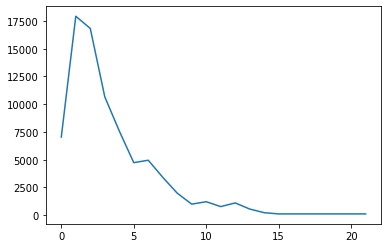

In [52]:
#can create a plot to visually see where the errors occur
predictions['Diff'].round().value_counts().sort_index().plot()

This dataframe and plot shows us that the largest errors occur earlier on in the dataset with the lowest errors occuring later in the dataset. This shows that the rolling means method is effective as the more data that comes before the target date of prediction the more accurate the predicted data is.

#### Sources
[1] - https://en.wikipedia.org/wiki/Machine_learning

[2] - https://www.colostate.edu/

[3] - https://www.dataquest.io
